In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_to_repo = "/mnt/nas_home/mrgj4/final_repo/thesis-code/"

In [3]:
languages = ["tr"]

setups = ["verb", "noun", "noun_verb"]

seeds = ["seed1", "seed2", "seed3"]

In [4]:
lang_results_mUNITER = {}

for lang in languages:

    setup_results = {}

    for setup in setups:
        seed_results = {}
        for seed in seeds:
            with open(path_to_repo + "experiment_3/grammatical_properties/{l}/{s}/{setup}/test/pytorch_model_best.bin-/eval.txt".format(l = lang, setup = setup, s = seed)) as f:
                lines = f.readlines()
                score = float(lines[0].split(" ")[-2])
            seed_results[seed] = score 
        setup_results[setup] = seed_results  
    
    lang_results_mUNITER[lang] = setup_results

In [7]:
def get_avg_std(lang, lang_results, setups):
    results = lang_results[lang]

    means = []
    stds = []

    for setup in setups:
        setup_results = np.asarray([results[setup]["seed1"], results[setup]["seed2"], results[setup]["seed3"]])
        means.append(setup_results.mean())
        stds.append(setup_results.std())
    
    return means, stds

In [66]:
def plot_results(lang, means, stds, ylim = [50, 64]):
    
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams["figure.figsize"] = (10, 8)

    # width of the bars
    barWidth = 0.5
    
    # Choose the height of the blue bars
    bars1 = means
    
    # Choose the height of the error bars (bars1)
    yer1 = [2 * std for std in stds]
    
    # The x position of bars
    r1 = np.arange(len(bars1))
    
    plt.bar(r1, bars1, width = barWidth, color = 'lightcyan', edgecolor = 'black', yerr=yer1, capsize=7, label="mUNITER")

    plt.title("{l}".format(l = lang.upper()))
    plt.ylabel('Accuracy (%)')
    plt.ylim(ylim)
    plt.xticks([0, 1, 2, 3], ['VERB', 'NOUN', 'NOUN+VERB', 'NOUN+VERB+ADJ+ADV'], size=8)
    plt.xlabel("Part-of-speech tag code-switched")
    # Show graphic
    plt.show()

### TR

In [67]:
means_tr_mUNITER, stds_tr_mUNITER = get_avg_std("tr", lang_results_mUNITER, setups)

In [68]:
# results from previous experiment
mean_tr_all_pos_tags = 60.14
std_tr_all_pos_tags = 1.62

means_tr_mUNITER.append(mean_tr_all_pos_tags)
stds_tr_mUNITER.append(std_tr_all_pos_tags)

In [70]:
means_tr_mUNITER

[56.89266666666666, 59.774, 59.548, 60.14]

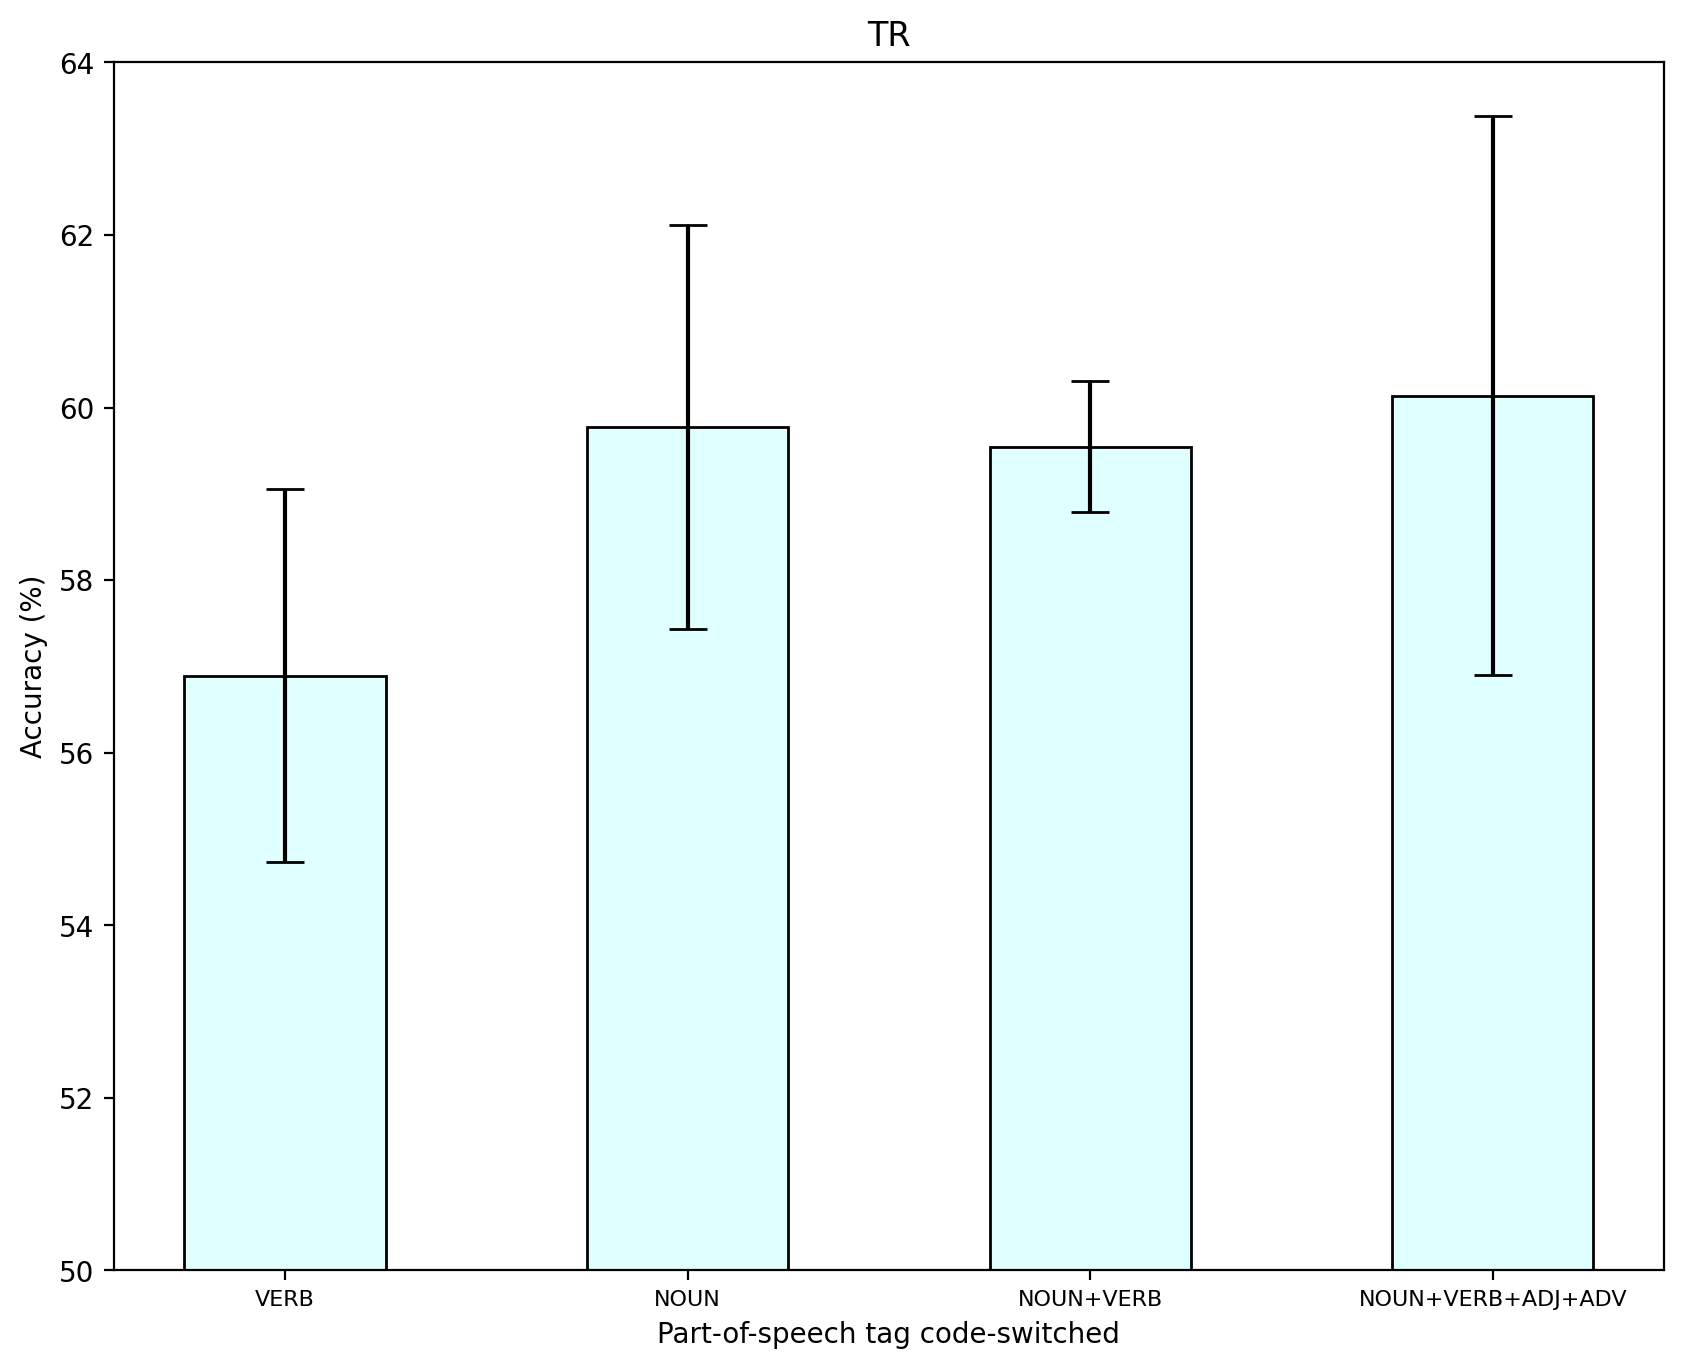

In [69]:
plot_results("tr", means_tr_mUNITER, stds_tr_mUNITER)